<a href="https://colab.research.google.com/github/riccardobean/star-classification/blob/main/Star_Classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Star Classification using Machine Learning and reproduction of the Hertzsprung Russell diagram

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

*   Fetch data from GitHub repository using pandas and display a few values



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/riccardobean/star-classification/main/Star%20Dataset.csv')
data['Temperature (K)'] = data['Temperature (K)'].astype(float)
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.0,0.002400,0.1700,16.12,0,Red,M
1,3042.0,0.000500,0.1542,16.60,0,Red,M
2,2600.0,0.000300,0.1020,18.70,0,Red,M
3,2800.0,0.000200,0.1600,16.65,0,Red,M
4,1939.0,0.000138,0.1030,20.06,0,Red,M


*   X and Y data split
*   Train and test data split


In [ ]:
# Data split
x = data.drop(['Star type', 'Star color', 'Spectral Class'], axis = 'columns').values
y = data['Star type'].values

# Train and test data split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state=13)

In [ ]:
Y_train = to_categorical(y_train, 6)
Y_test = to_categorical(y_test, 6)

X_train = np.asarray(x_train).astype('float32')
X_test = np.asarray(x_test).astype('float32')

scaler = StandardScaler()
xtrain = scaler.fit_transform(X_train)
xtest = scaler.fit_transform(X_test)

ytrain = tf.convert_to_tensor(Y_train)
ytest = tf.convert_to_tensor(Y_test)

**Model**

In [ ]:
model = Sequential ([
    Dense(256, activation = 'relu', input_shape = (4,)),
    Dense(512, activation = 'relu'),
    Dense(512, activation = 'relu'),
    Dense(6, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 398,598
Trainable params: 398,598
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 20
batch_size = 64

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size = batch_size, epochs = n_epochs, validation_data = (xtest, ytest))

Epoch 1/20
3/3 [==============================] - 1s 135ms/step - loss: 1.6691 - accuracy: 0.3036 - val_loss: 1.4141 - val_accuracy: 0.6528
Epoch 2/20
3/3 [==============================] - 0s 37ms/step - loss: 1.2783 - accuracy: 0.7321 - val_loss: 1.1194 - val_accuracy: 0.7083
Epoch 3/20
3/3 [==============================] - 0s 36ms/step - loss: 0.9578 - accuracy: 0.7321 - val_loss: 0.8326 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 0s 27ms/step - loss: 0.6864 - accuracy: 0.7679 - val_loss: 0.6026 - val_accuracy: 0.9028
Epoch 5/20
3/3 [==============================] - 0s 41ms/step - loss: 0.4867 - accuracy: 0.8929 - val_loss: 0.4275 - val_accuracy: 0.9722
Epoch 6/20
3/3 [==============================] - 0s 35ms/step - loss: 0.3482 - accuracy: 0.9583 - val_loss: 0.3177 - val_accuracy: 0.9861
Epoch 7/20
3/3 [==============================] - 0s 46ms/step - loss: 0.2725 - accuracy: 0.9286 - val_loss: 0.2343 - val_accuracy: 0.9861
Epoch 8/20
3/3 [==========

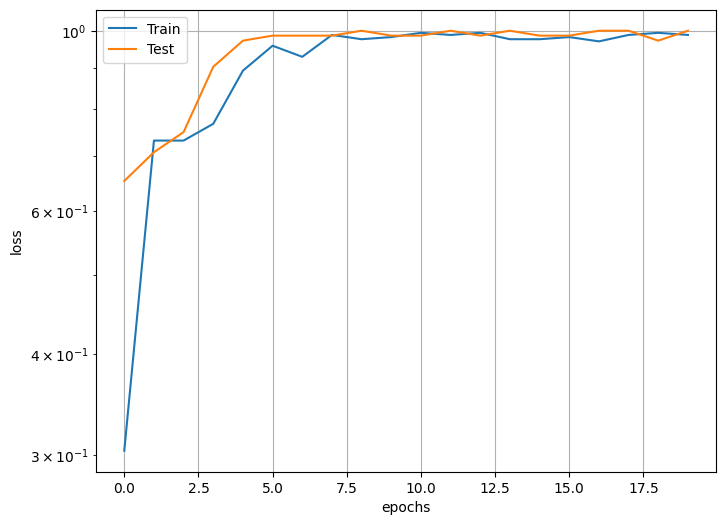

In [ ]:
loss_history_train = history.history['accuracy']
loss_history_test = history.history['val_accuracy']

plt.figure(figsize=(8,6))
plt.semilogy(loss_history_train, label = 'Train')
plt.semilogy(loss_history_test, label = 'Test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

In [ ]:
y_hat = np.argmax(model.predict(xtest), axis = -1) # pick the index of the greatest number in an array
test_accuracy = np.mean(y_hat == y_test)
print("Test Accuracy: ", test_accuracy*100, "%")

3/3 [==============================] - 0s 11ms/step
Test Accuracy:  100.0 %


In [ ]:
print(y_hat)
print(y_test)

bd_hat = 0
rd_hat = 0
wd_hat = 0
ms_hat = 0
s_hat = 0
h_hat = 0

bd_test = 0
rd_test = 0
wd_test = 0
ms_test = 0
s_test = 0
h_test = 0

for i in range(len(y_hat)):
  if y_hat[i] == 0:
    bd_hat += 1
  if y_hat[i] == 1:
    rd_hat += 1
  if y_hat[i] == 2:
    wd_hat += 1
  if y_hat[i] == 3:
    ms_hat += 1
  if y_hat[i] == 4:
    s_hat += 1
  if y_hat[i] == 5:
    h_hat += 1

for i in range(len(y_test)):
  if y_test[i] == 0:
    bd_test += 1
  if y_test[i] == 1:
    rd_test += 1
  if y_test[i] == 2:
    wd_test += 1
  if y_test[i] == 3:
    ms_test += 1
  if y_test[i] == 4:
    s_test += 1
  if y_test[i] == 5:
    h_test += 1

print("\nPredicted number of Brown Dwarfs:", bd_hat)
print("Predicted number of Red Dwarfs:", rd_hat)
print("Predicted number of White Dwarfs:", wd_hat)
print("Predicted number of Main Sequence Stars:", ms_hat)
print("Predicted number of Super Giants:", s_hat)
print("Predicted number of Hyper Giants:", h_hat)

print("\nActual number of Brown Dwarfs:", bd_test)
print("Actual number of Red Dwarfs:", rd_test)
print("Actual number of White Dwarfs:", wd_test)
print("Actual number of Main Sequence Stars:", ms_test)
print("Actual number of Super Giants:", s_test)
print("Actual number of Hyper Giants:", h_test)

[2 0 3 3 2 1 5 5 4 4 0 4 3 4 1 0 5 4 3 5 0 5 2 0 2 5 0 3 2 3 4 3 4 3 1 4 5
 0 0 0 5 5 0 4 4 1 1 1 0 3 3 2 3 1 3 1 4 2 1 2 0 0 2 2 1 3 1 3 1 0 1 2]
[2 0 3 3 2 1 5 5 4 4 0 4 3 4 1 0 5 4 3 5 0 5 2 0 2 5 0 3 2 3 4 3 4 3 1 4 5
 0 0 0 5 5 0 4 4 1 1 1 0 3 3 2 3 1 3 1 4 2 1 2 0 0 2 2 1 3 1 3 1 0 1 2]

Predicted number of Brown Dwarfs: 14
Predicted number of Red Dwarfs: 13
Predicted number of White Dwarfs: 11
Predicted number of Main Sequence Stars: 14
Predicted number of Super Giants: 11
Predicted number of Hyper Giants: 9

Actual number of Brown Dwarfs: 14
Actual number of Red Dwarfs: 13
Actual number of White Dwarfs: 11
Actual number of Main Sequence Stars: 14
Actual number of Super Giants: 11
Actual number of Hyper Giants: 9


**Hertzsprung-Russell Diagram**

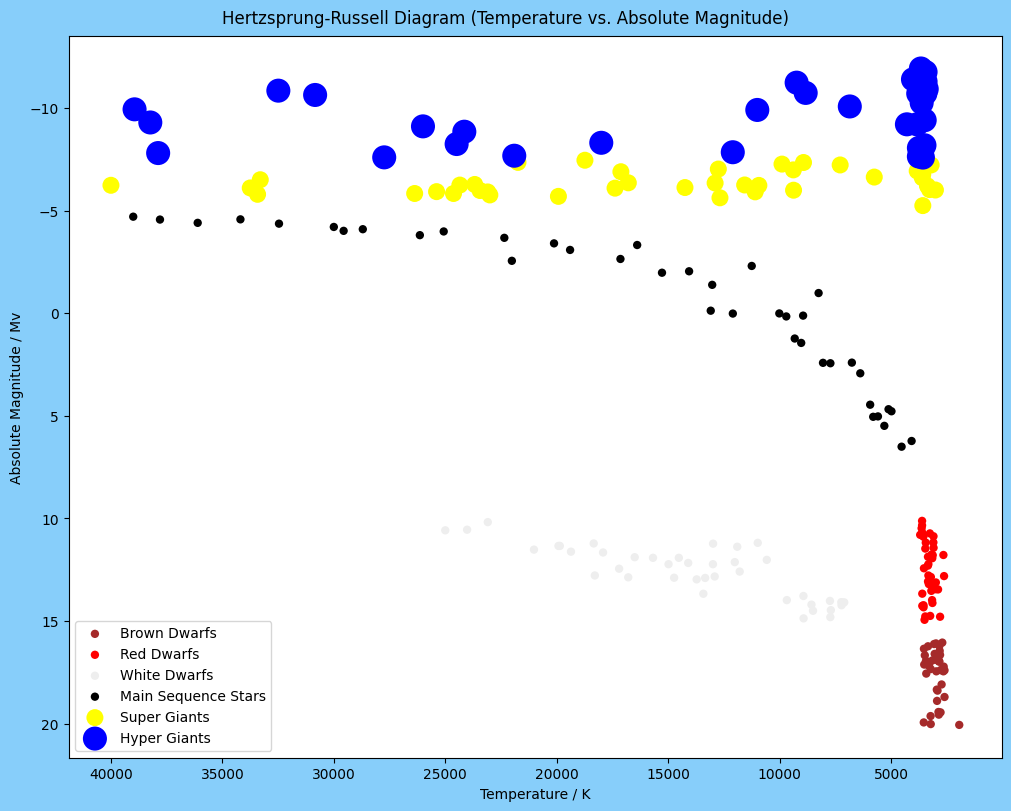

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), facecolor='lightskyblue', layout='constrained')
fig.suptitle('Hertzsprung-Russell Diagram (Temperature vs. Absolute Magnitude)')

for i in range(len(y)):
  if y[i] == 0:
    bd = ax.scatter(x[i][0], x[i][3], c = 'brown', edgecolor = 'none', marker = 'o')
  if y[i] == 1:
    rd = ax.scatter(x[i][0], x[i][3], c = 'red', edgecolor = 'none', marker = 'o')
  if y[i] == 2:
    wd = ax.scatter(x[i][0], x[i][3], c = '#eeeeee', edgecolor = 'none', marker = 'o')
  if y[i] == 3:
    ms = ax.scatter(x[i][0], x[i][3], c = 'black', edgecolor = 'none', marker = 'o')
  if y[i] == 4:
    s = ax.scatter(x[i][0], x[i][3], c = 'yellow', s = 150, edgecolor = 'none', marker = 'o')
  if y[i] == 5:
    h = ax.scatter(x[i][0], x[i][3], c = 'blue', s = 300, edgecolor = 'none', marker = 'o')

plt.xlabel("Temperature / K")
plt.ylabel("Absolute Magnitude / Mv")
ax.legend([bd, rd, wd, ms, s, h], ['Brown Dwarfs', 'Red Dwarfs', 'White Dwarfs', 'Main Sequence Stars', 'Super Giants', 'Hyper Giants'], loc = 'best')

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()